Import the necessary libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import joblib

Import RF Signal Dataset

In [42]:
df = pd.read_csv('../data/logged_data.csv')

Normalize/Standardize variables

In [43]:
# Initialize label encoders and scaler
label_encoders = {}
scaler = StandardScaler()

# Categorical columns
categorical_columns = ['Antenna Type', 'Interference Type', 'Device Type', 'Power Source']

# Label encode categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Numerical columns
numerical_columns = ['Frequency', 'Signal Strength', 'Bandwidth', 'Battery Level']

# Scale numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Create Synthetic Data for Harvested Energy

In [44]:
def calculate_harvested_energy(row):
    return (
        0.4 * row['Frequency'] +
        0.2 * row['Signal Strength'] +
        0.1 * row['Bandwidth'] +
        0.05 * (row['Antenna Type'] == 'Yagi') +  
        0.025 * (row['Antenna Type'] == 'Dipole') + 
        0.01667 * (row['Antenna Type'] == 'Omnidirectional') + 
        0.0125 * (row['Antenna Type'] == 'Directional') + 
        0.02 * (row['Interference Type'] == 'None') -
        0.00667 * (row['Interference Type'] == 'Co-channel') +
        0.00667 * (row['Interference Type'] == 'Intermodulation') +
        0.005 * (row['Interference Type'] == 'Adjacent-channel') +
        0.05 * (row['Device Type'] == 'HackRF') + 
        0.05 * (row['Device Type'] == 'Halow-U') + 
        0.05 * (row['Device Type'] == 'SteamDeck') + 
        0.3 * row['Power Source'] +
        0.1 * row['Battery Level'] +
        np.random.normal(0, 0.05)  # Random noise for variability
    )

df['Harvested Energy'] = df.apply(calculate_harvested_energy, axis=1)


Set features and target to variables X and y

In [45]:
X = df[['Frequency', 'Signal Strength', 'Bandwidth'
        , 'Antenna Type', 'Interference Type', 'Device Type', 'Power Source', 'Battery Level']]
y = df['Harvested Energy']

Split the data into training and test sets


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create a linear regression model


In [49]:
model = LinearRegression()

Train the model


In [50]:
model.fit(X_train, y_train)

LinearRegression()

Predict harvested energy on the test set


In [51]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

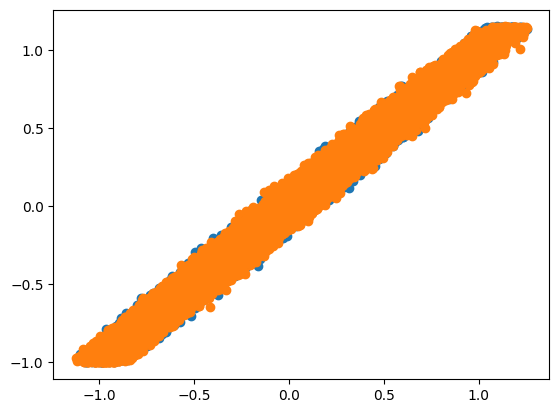

In [52]:
#Scatterplot of testing set
plt.scatter(y_test, test_pred)

#scatterplot of training set
plt.scatter(y_train, train_pred)

Evaluate the model


In [53]:
rmse = np.sqrt(mean_squared_error(y_test,test_pred))
print(f'Root Mean Square Error: {rmse}')

Root Mean Square Error: 0.04985673826990341


In [54]:
print(df['Harvested Energy'][1])
print(train_pred[1])
print(test_pred[1])

0.49714351011649954
-0.1946363281308823
0.33427783254768983


Interpret the model

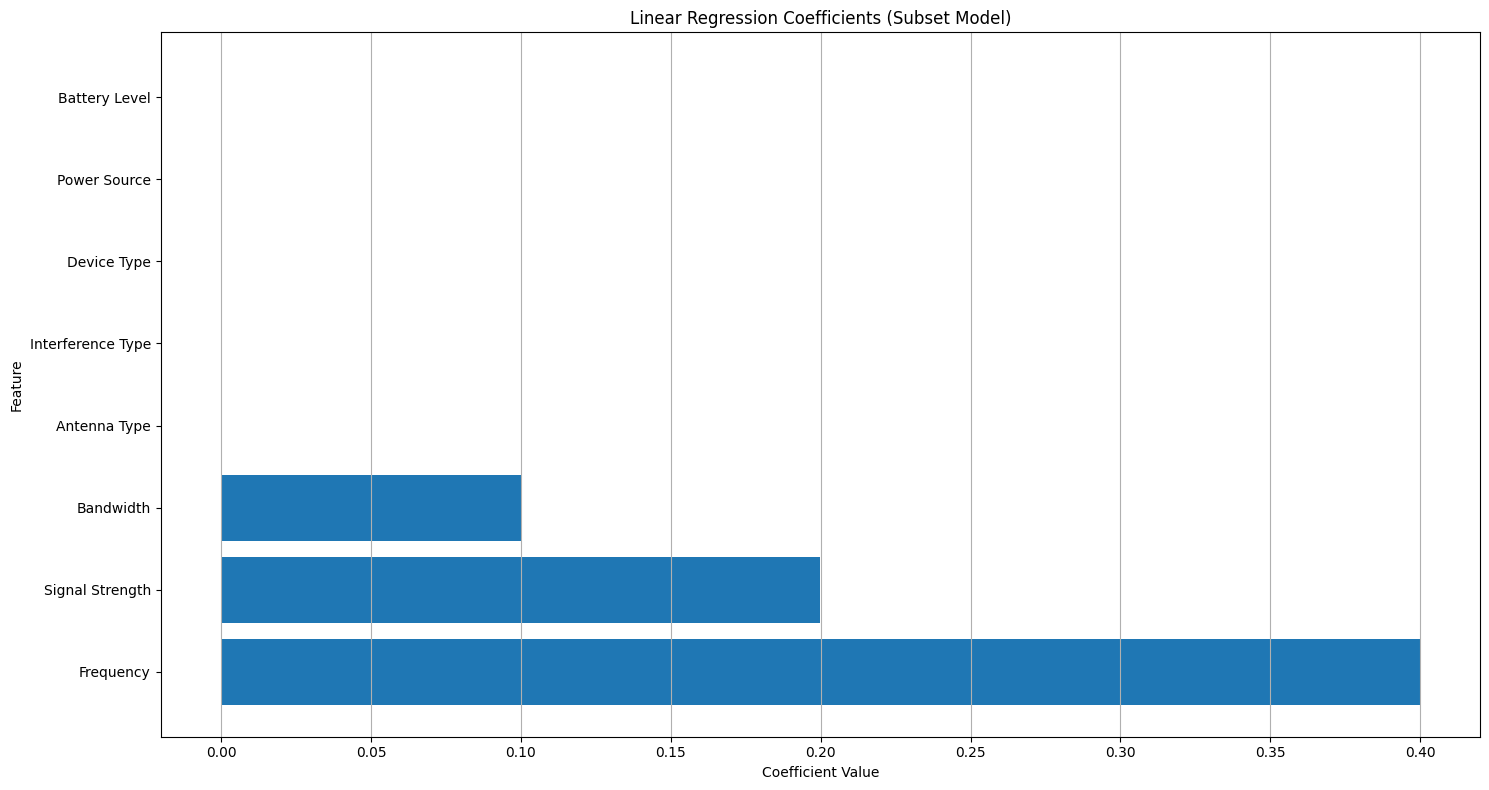

In [55]:
# Get feature names from the dataset
feature_names_subset = X.columns

# Get coefficients from the trained model on the subset
coefficients_subset = model.coef_

# Plotting the coefficients
plt.figure(figsize=(15, 8))
plt.barh(feature_names_subset, coefficients_subset)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients (Subset Model)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [56]:
pickle.dump(model, open('model.pkl', "wb"))

In [57]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [58]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']